In [1]:
#EDA & Feature Engineering
#observation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"D:\Downloaded files\student_performance\data\student.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.shape

(1000, 8)

In [6]:
df["gender"].dtype=="O"

True

In [7]:
[fea for fea in df.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [8]:
num_column=[fea for fea in df.columns if df[fea].dtypes!="O"]

In [9]:
num_column

['math score', 'reading score', 'writing score']

In [10]:
num_column

['math score', 'reading score', 'writing score']

In [11]:
df.memory_usage()

Index                           132
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [17]:
df[num_column].cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [18]:
df[num_column].skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

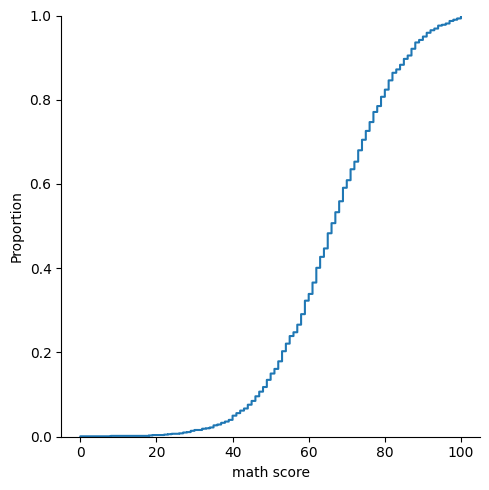

In [19]:
sns.displot(df["math score"] ,kind="ecdf")

In [20]:
df["reading score"].mean()

69.169

In [21]:
(df["math score"] + df["reading score"] + df["writing score"])/3

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [22]:
df["average"]=(df["math score"] + df["reading score"] + df["writing score"])/3

In [23]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [25]:
from scipy.stats import normaltest

In [26]:
normaltest(df["math score"])[1]*100

0.04508029386993784

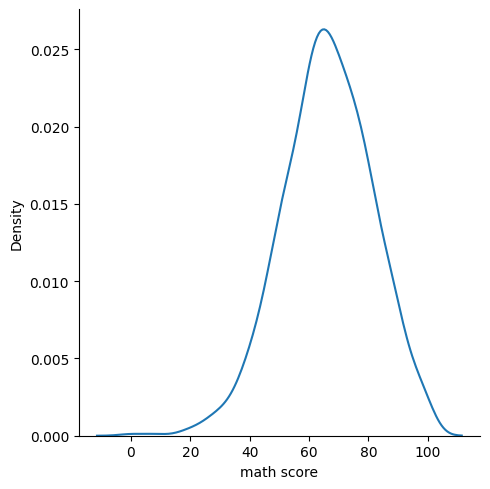

In [27]:
sns.displot(df["math score"],kind="kde")

In [28]:
#outliers

<Axes: >

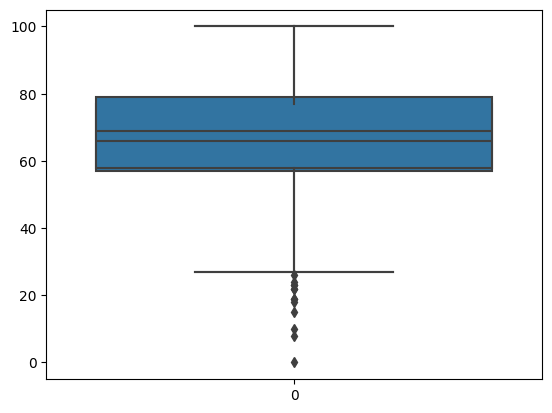

In [29]:
sns.boxplot(data=df["math score"])
sns.boxplot(data=df["writing score"])

In [30]:
q1=df["math score"].quantile(0.25)


In [31]:
q3=df["math score"].quantile(0.75)


In [32]:
IQR=q3 - q1

In [33]:
IQR

20.0

In [34]:
lower_fence=q1 - 1.5 *IQR

In [35]:
higher_fence=q3 + 1.5 * IQR

In [36]:
lower_fence

27.0

In [37]:
higher_fence

107.0

In [38]:
df[df["math score"] <lower_fence]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [39]:
df[df["math score"] > higher_fence]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


In [51]:
def outlier_threshold(data, column_name ):
    """ this funtion is used to find  IQR , higher_fence , lower_fence"""
    q1=data[column_name].quantile(0.25)
    q3=data[column_name].quantile(0.75)
    IQR=q3 - q1
    lower_fence=q1 - 1.5 * IQR
    higher_fence=q3 + 1.5 * IQR
    return IQR , lower_fence , higher_fence          


In [52]:
for variable in df[num_column]:   # calling fuction for higher limit as well as lower limit
      IQR,lower_limit,higher_limit=outlier_threshold(df , "math score")

In [46]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [59]:
def replace_with_threshold(data,column_name):
    for variable in column_name:
        lower_limit,higher_limit=outlier_threshold(data,column_name)
        data.loc[data[variable]<low_limit,variable]=lower_limit
        data.loc[data[variable]>upper_limit,variable]=higher_limit
        

In [63]:
replace_with_threshold(df,df[num].columns())

TypeError: 'Index' object is not callable

In [ ]:
df

In [44]:
num=[i for i in df.columns if df[i].dtypes !="O" ] # using loop for mamking new variables to avoid error 

In [45]:
df[num]

,math score,reading score,writing score,average
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333
...,...,...,...,...
995,88,99,95,94.000000
996,62,55,55,57.333333
997,59,71,65,65.000000
998,68,78,77,74.333333


In [ ]:
data_average=df.groupby("gender")[num].mean() # average of numericals values respect to gender

In [ ]:
data_average

In [ ]:
data_average["average"][0] # average respect to female of Average coloumn

In [ ]:
data_average["average"][1]

In [ ]:
data_average["math score"][1] #average respect to male math score

In [ ]:
female_score=data_average["average"][0], data_average["math score"][0]

In [ ]:
male_score=data_average["average"][1], data_average["math score"][1]

In [ ]:
plt.figure(figsize=(10,10))
X=["Total avg", "math avg"]
female_score=data_average["average"][0], data_average["math score"][0]
male_score=data_average["average"][1], data_average["math score"][1]
X_axis=np.arange(len(X))
plt.bar(X_axis -0.2, male_score,0.4,label="male")
plt.bar(X_axis +0.2,female_score,0.4,label="female")


plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg ", fontweight="bold")
plt.legend()
plt.show()


In [ ]:
sns.heatmap(df[num].corr(), annot=True , cmap="icefire",linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable ", color="black",size=25)
plt.show()

In [ ]:
sns.pairplot(df[num])

In [ ]:
sns.violinplot(data=df[num])